# Credit Card Fraud Detection

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

As per an article on spd.group:
From the moment the e-commerce payment systems came to existence, there have always been people who will find new ways to access someone’s finances illegally. This has become a major problem in the modern era, as all transactions can easily be completed online by only entering your credit card information. Even in the 2010s, many American retail website users were the victims of online transaction fraud right before two-step verification was used for shopping online. Organizations, consumers, banks, and merchants are put at risk when a data breach leads to monetary theft and ultimately the loss of customers’ loyalty along with the company’s reputation.

Unauthorized card operations hit an astonishing amount of 16.7 million victims in 2017. Additionally, as reported by the Federal Trade Commission (FTC), the number of credit card fraud claims in 2017 was 40% higher than the previous year’s number. There were around 13,000 reported cases in California and 8,000 in Florida, which are the largest states per capita for such type of crime. The amount of money at stake will exceed approximately $30 billion by 2020.

Thus, fraud detection systems have become essential for banks and financial institution, to minimize their losses. However, there is a lack of published literature on credit card fraud detection techniques, due to the unavailable credit card transactions dataset for researchers. 

We will try to detect fraudulent credit card transaction using Machine Learning Algorrithms Random Forest Classifier, Support Vector Machines, Logistic Regression, Naive Bayes, and K-NearestNeighbor Classifier. 

### Installing the required packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef

### Installing the Dataset

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.shape

(284807, 31)

In [6]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### Data Visualisation & Understanding

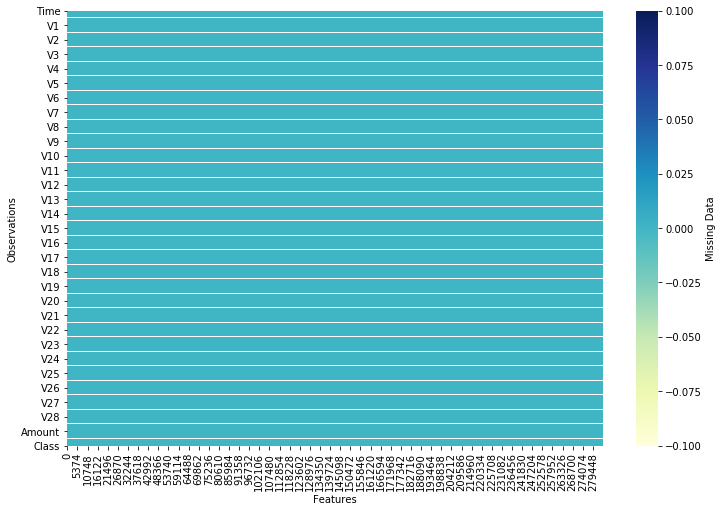

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isna().transpose(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

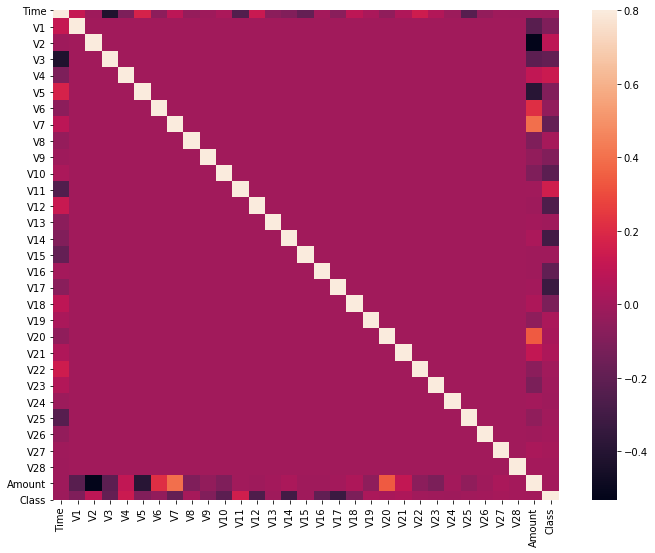

In [8]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

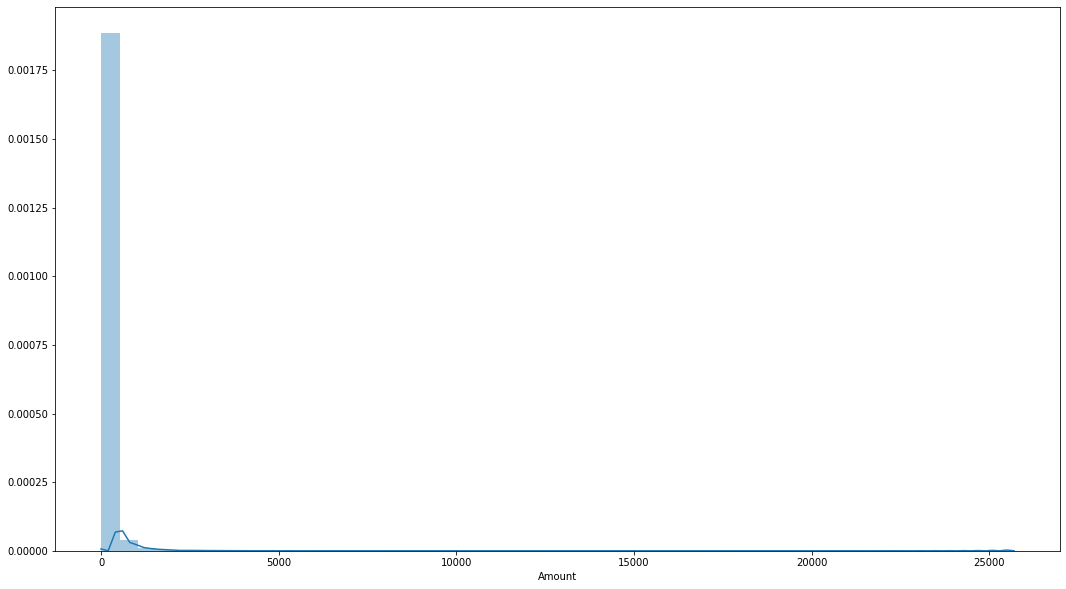

In [9]:
plt.figure(figsize=(18,10))
sns.distplot(data["Amount"])

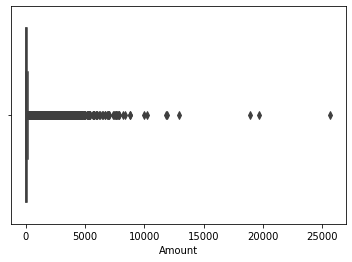

In [10]:
sns.boxplot(data=data,x='Amount')
plt.show()

### Data Cleaning

In [11]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [12]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [13]:
valid.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


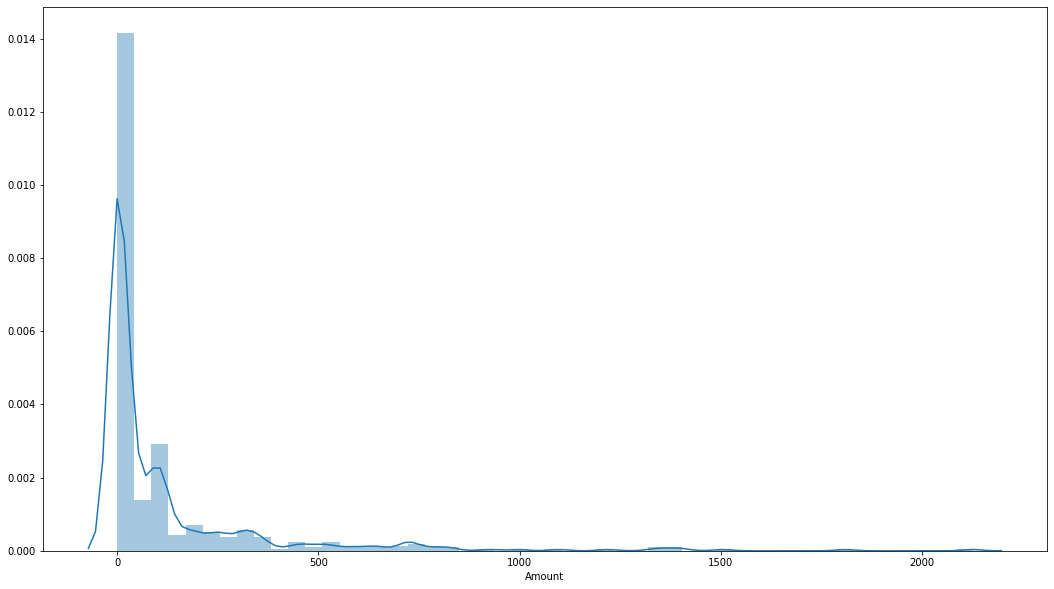

In [14]:
plt.figure(figsize=(18,10))
sns.distplot(fraud["Amount"])

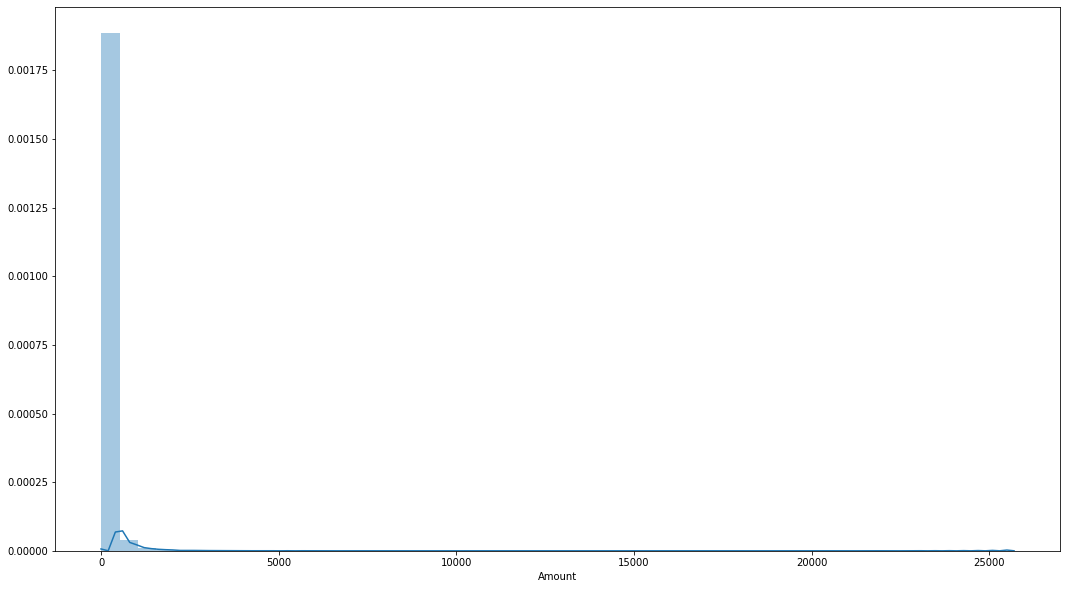

In [15]:
plt.figure(figsize=(18,10))
sns.distplot(valid["Amount"])

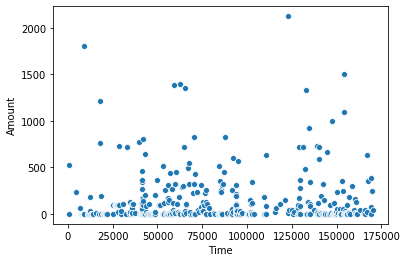

In [16]:
# Scatterplot
sns.scatterplot(data=fraud, x='Time', y='Amount')
plt.show()

### Splitting X & Y variable

In [17]:
#Separating X and Y for feature and target splitting
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
X.shape

(284807, 30)

In [18]:
Y.shape

(284807,)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Detection using Machine Learning Algorithms

### Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

*Source: scikit-learn.org*

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest classifier Results
The accuracy is 0.999420666409185
The precision is 0.9452054794520548
The recall is 0.7040816326530612
The F1-Score is 0.8070175438596492
The Matthews correlation coefficient is0.8155221936048568


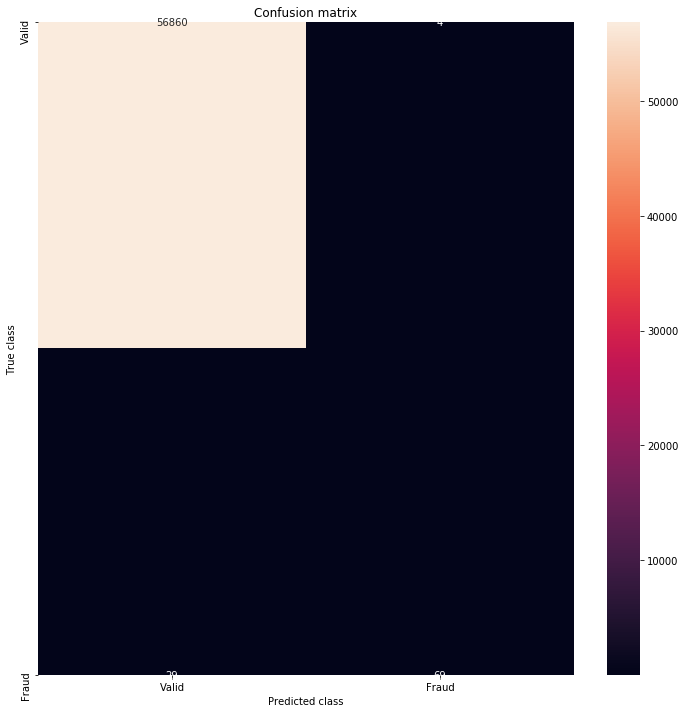

In [20]:
#Random Forest
rand_for=RandomForestClassifier()
rand_for.fit(X_train,Y_train)
Y_pred_rf=rand_for.predict(X_test)

print("Random Forest classifier Results")
 
acc_rf = accuracy_score(Y_test, Y_pred_rf)
print("The accuracy is {}".format(acc_rf))
 
prec_rf = precision_score(Y_test, Y_pred_rf)
print("The precision is {}".format(prec_rf))
 
rec_rf = recall_score(Y_test, Y_pred_rf)
print("The recall is {}".format(rec_rf))
 
f1_rf = f1_score(Y_test, Y_pred_rf)
print("The F1-Score is {}".format(f1_rf))
 
MCC_rf = matthews_corrcoef(Y_test, Y_pred_rf)
print("The Matthews correlation coefficient is{}".format(MCC_rf))

label = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = label,
            yticklabels = label, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Logistic Regression

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional l1,l2 or Elastic-Net regularization.

*Source: scikit-learn.org*

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Results
The accuracy is 0.9989993328885924
The precision is 0.8253968253968254
The recall is 0.5306122448979592
The F1-Score is 0.6459627329192548
The Matthews correlation coefficient is0.6613449759956226


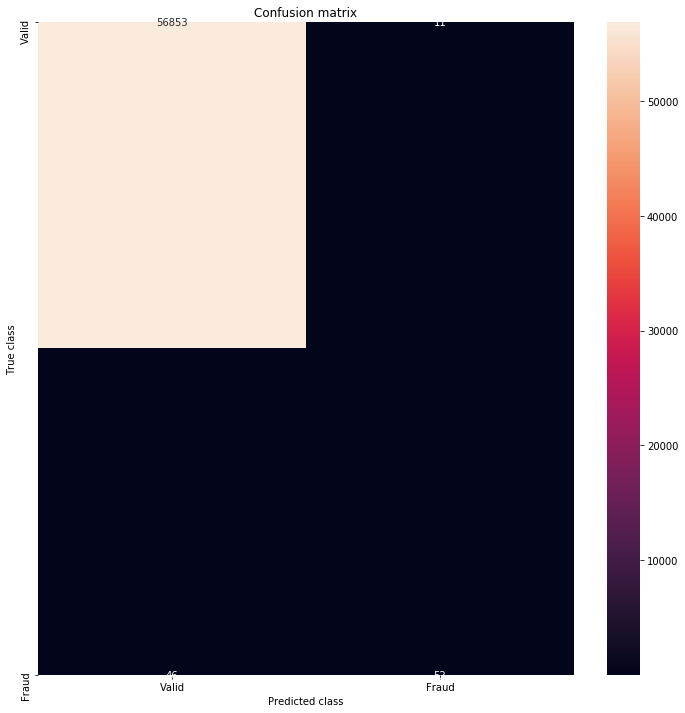

In [21]:
#Logistic Regression

logr=LogisticRegression()
logr.fit(X_train,Y_train)
Y_pred_lr=logr.predict(X_test)

print("Logistic Regression Results")
 
acc_lr = accuracy_score(Y_test, Y_pred_lr)
print("The accuracy is {}".format(acc_lr))
 
prec_lr = precision_score(Y_test, Y_pred_lr)
print("The precision is {}".format(prec_lr))
 
rec_lr = recall_score(Y_test, Y_pred_lr)
print("The recall is {}".format(rec_lr))
 
f1_lr = f1_score(Y_test, Y_pred_lr)
print("The F1-Score is {}".format(f1_lr))
 
MCC_lr = matthews_corrcoef(Y_test, Y_pred_lr)
print("The Matthews correlation coefficient is{}".format(MCC_lr))

label = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = label,
            yticklabels = label, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. 

The advantages of support vector machines are:
> 1. Effective in high dimensional spaces. <br>
> 2. Still effective in cases where number of dimensions is greater than the number of samples.<br>
> 3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.<br>
> 4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

*Source: scikit-learn.org*

Support Vector Machine Results
The accuracy is 0.9984551104244935
The precision is 0.6041666666666666
The recall is 0.29591836734693877
The F1-Score is 0.3972602739726027
The Matthews correlation coefficient is0.4221655953416209


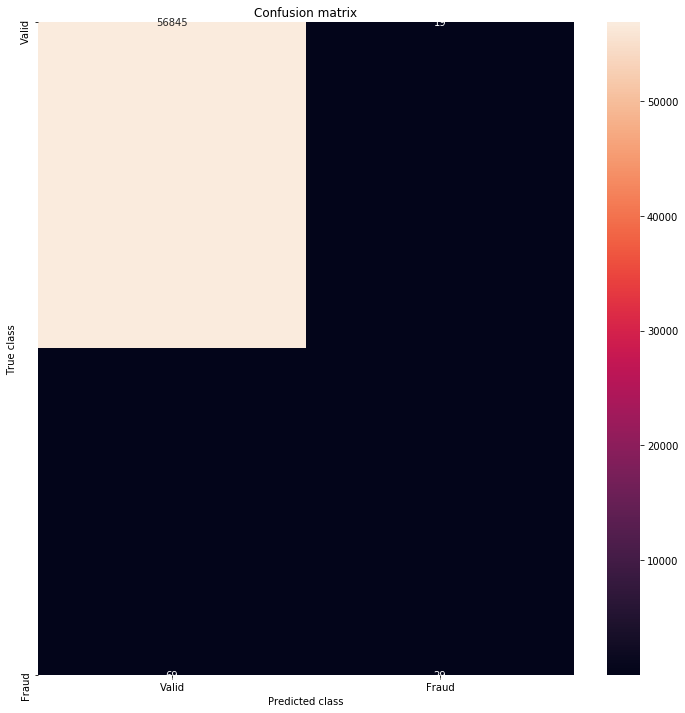

In [22]:
#Support Vector Machines

sv= svm.SVC(kernel='linear')
sv.fit(X_train,Y_train)
Y_pred_sv=sv.predict(X_test)

print("Support Vector Machine Results")
 
acc_sv = accuracy_score(Y_test, Y_pred_sv)
print("The accuracy is {}".format(acc_sv))
 
prec_sv = precision_score(Y_test, Y_pred_sv)
print("The precision is {}".format(prec_sv))
 
rec_sv = recall_score(Y_test, Y_pred_sv)
print("The recall is {}".format(rec_sv))
 
f1_sv = f1_score(Y_test, Y_pred_sv)
print("The F1-Score is {}".format(f1_sv))
 
MCC_sv = matthews_corrcoef(Y_test, Y_pred_sv)
print("The Matthews correlation coefficient is{}".format(MCC_sv))

label = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred_sv)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = label,
            yticklabels = label, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

*Source: scikit-learn.org*

Naive Bayes Results
The accuracy is 0.9930128857835048
The precision is 0.14622641509433962
The recall is 0.6326530612244898
The F1-Score is 0.2375478927203065
The Matthews correlation coefficient is0.3019617859258202


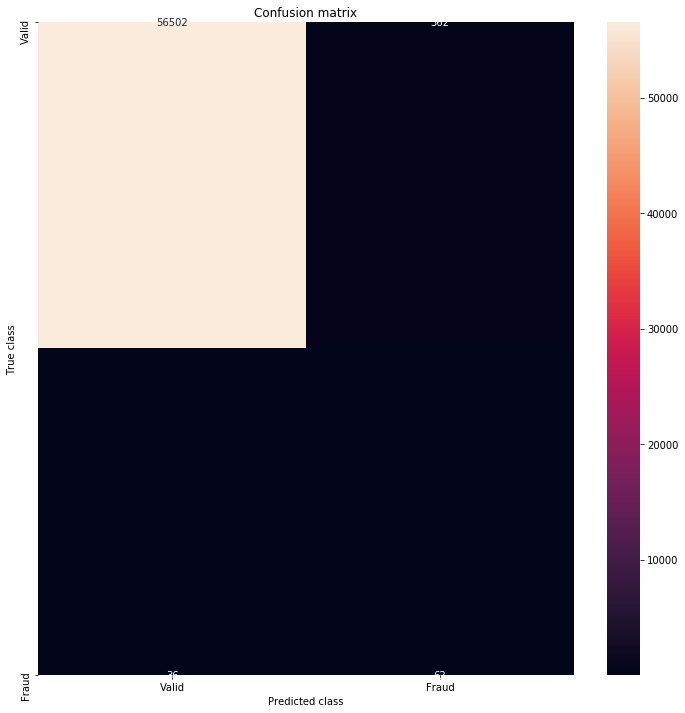

In [23]:
#Naive Bayes

gb= GaussianNB()
gb.fit(X_train,Y_train)
Y_pred_gb=gb.predict(X_test)

print("Naive Bayes Results")
 
acc_gb = accuracy_score(Y_test, Y_pred_gb)
print("The accuracy is {}".format(acc_gb))
 
prec_gb = precision_score(Y_test, Y_pred_gb)
print("The precision is {}".format(prec_gb))
 
rec_gb = recall_score(Y_test, Y_pred_gb)
print("The recall is {}".format(rec_gb))
 
f1_gb = f1_score(Y_test, Y_pred_gb)
print("The F1-Score is {}".format(f1_gb))
 
MCC_gb = matthews_corrcoef(Y_test, Y_pred_gb)
print("The Matthews correlation coefficient is{}".format(MCC_gb))

label = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred_gb)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = label,
            yticklabels = label, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### KNeighbor Classifier

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point. 

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

*Source:scikit-learn.org*

K Neighbour Results
The accuracy is 0.9984199992977775
The precision is 1.0
The recall is 0.08163265306122448
The F1-Score is 0.15094339622641506
The Matthews correlation coefficient is0.2854884503706513


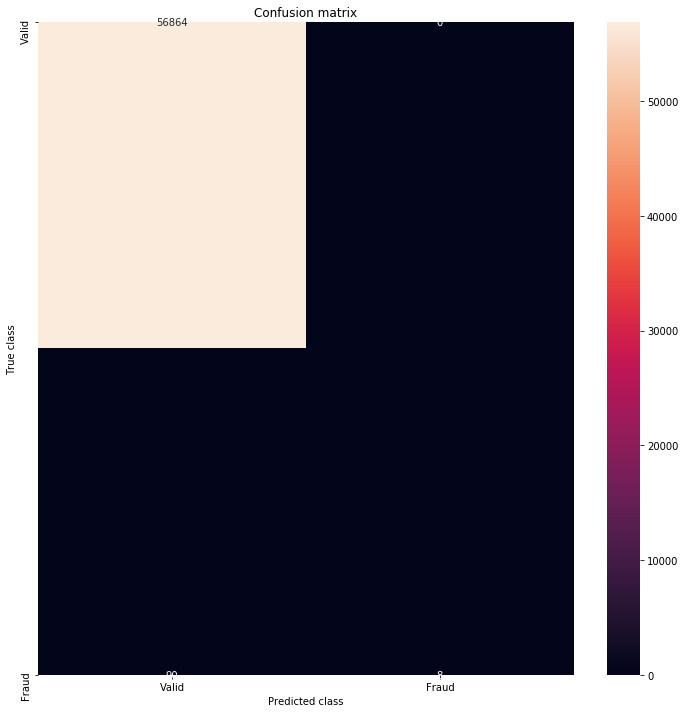

In [24]:
#KNeighbour Classifier

knc=KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train,Y_train)
Y_pred_knc=knc.predict(X_test)

print("K Neighbour Results")
 
acc_knc = accuracy_score(Y_test, Y_pred_knc)
print("The accuracy is {}".format(acc_knc))
 
prec_knc = precision_score(Y_test, Y_pred_knc)
print("The precision is {}".format(prec_knc))
 
rec_knc = recall_score(Y_test, Y_pred_knc)
print("The recall is {}".format(rec_knc))
 
f1_knc = f1_score(Y_test, Y_pred_knc)
print("The F1-Score is {}".format(f1_knc))
 
MCC_knc = matthews_corrcoef(Y_test, Y_pred_knc)
print("The Matthews correlation coefficient is{}".format(MCC_knc))

label = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred_knc)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = label,
            yticklabels = label, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Final Prediction Results

In [27]:
conclusion=pd.DataFrame({'Model':['Random Forest Classifier','Logistic Regression','Support Vector Machine','Naive Bayes',
                                  'K-NeighborClassifier'],'Accuracy':[acc_rf,acc_lr,acc_sv,acc_gb,acc_knc],'Precision':[prec_rf,
                                prec_lr,prec_sv,prec_gb,prec_knc],'Recall':[rec_rf,rec_lr,rec_sv,rec_gb,rec_knc],'F1 Scores':[f1_rf,
                                f1_lr,f1_sv,f1_gb,f1_knc],'Matthew Correlation Coefficient':[MCC_rf,MCC_lr,MCC_sv,MCC_gb,
                                                                                             MCC_knc]})

conclusion

,Model,Accuracy,Precision,Recall,F1 Scores,Matthew Correlation Coefficient
0,Random Forest Classifier,0.999421,0.945205,0.704082,0.807018,0.815522
1,Logistic Regression,0.998999,0.825397,0.530612,0.645963,0.661345
2,Support Vector Machine,0.998455,0.604167,0.295918,0.397260,0.422166
3,Naive Bayes,0.993013,0.146226,0.632653,0.237548,0.301962
4,K-NeighborClassifier,0.998420,1.000000,0.081633,0.150943,0.285488
